In [8]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

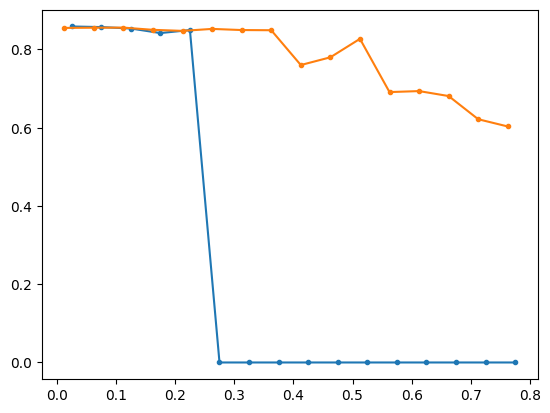

In [76]:

num_shots = 0
def file_reader(out_dir, model_name, n_list, cossim= True):
    acc = []
    if cossim:
        # out_dir = "cossim_results/"
        out_dir += f"{model_name.split('/')[-1]}/"
        for num_layer_dropped in n_list:
            file_dir = out_dir+ f"num_ldrop_{num_layer_dropped}_shots_{num_shots}/"
            fname = file_dir+ "accuracy.json"

            if os.path.exists(fname):
                f = open(fname)
                data = json.load(f)
                f.close()
                acc.append(data)
            else:
                acc.append(0)
    else:
        # out_dir = "results/"
        out_dir += f"{model_name.split('/')[-1]}/"
        for num_layer_dropped in n_list:
            first_layer_dropped = depth - num_layer_dropped -1
            file_dir =  out_dir + f"num_ldrop_{first_layer_dropped}_shots_{num_shots}/"
            fname = file_dir+ "accuracy.json"

            if os.path.exists(fname):
                f = open(fname)
                data = json.load(f)
                f.close()
                acc.append(data)
            else:
                acc.append(0)
    
    return acc


# model_name = "mistralai/Mistral-7B-v0.1"
model_name = "meta-llama/Llama-2-70b-hf"
depth = 80
n_list = np.arange(2,int(0.8*depth)+1,4)

out_dir = "cossim_results_no_prompt/"
acc_cs = file_reader(out_dir, model_name, n_list)
# out_dir = "results/"
out_dir = "results/"
acc = file_reader(out_dir, model_name, n_list, cossim= False)


boolq_accs_llama2_70B = np.array([0.8550267885282068, 0.8555783170501102, 0.8558146864166404, 0.850141821619918, 0.8474629687992437, 0.8525055152852189, 0.8495902930980146, 0.8491175543649543, 0.760163882760794, 0.7799401197604791, 0.8271352032776552, 0.6910652379451623, 0.6935865111881502, 0.6809013551843681, 0.6216514339741569, 0.603135833595966])
layers_removed_llama2_70B = 79 - np.array([78, 74, 70, 66, 62, 58, 54, 50, 46, 42, 38, 34, 30, 26, 22, 18])

plt.plot(n_list/depth, acc_cs, ".-", label = "cos informed")
plt.plot(layers_removed_llama2_70B/depth, boolq_accs_llama2_70B, ".-",label="old method")
# plt.plot(n_list/depth, acc, ".-")
plt.show()

In [50]:
list(range(73,15,-4))

[73, 69, 65, 61, 57, 53, 49, 45, 41, 37, 33, 29, 25, 21, 17]